# Sklearn Documentation Notes


In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection as ms
%matplotlib inline
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = ms.train_test_split(X, y)
Xreg = X[50:, np.newaxis,0]
yreg = X[50:, 2]

# Linear Models

## Linear Regression

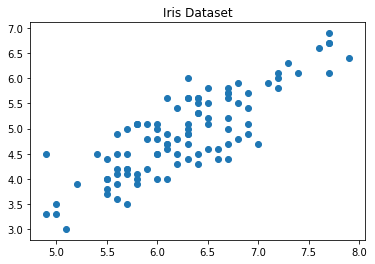

In [3]:
plt.scatter(X[50:, 0 ], X[50:, 2], )
plt.title("Iris Dataset")
plt.show()

### Oridinary Least Squares (Linear Regression Vuln. to Outliers and Colinearity) 
Ordinary Least Squares Regression fits a model to miniimize the residual sum of squares. Stores weights in the ".coef_" attribute. Assumes that features are normal and independent, thus vulnerable to colinearity. Colinearity means the effect of one feature on an outcome is explained by a single or combination of other features, when this happens the weight matrix has a lot of room for change, and becomes very sensitive to random errors in the data.

This method has a cost of $O(np^2)$ if X is the training set of size (n,p).

This issue of collinearity and multicolinearity is adressed with ridge regression.

0.68637689332401108

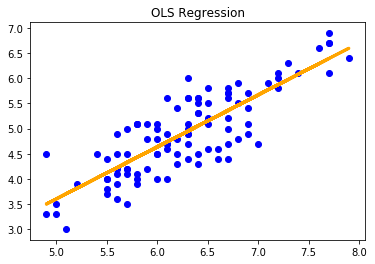

In [4]:
OLE = linear_model.LinearRegression()
OLE.fit(Xreg, yreg)
y_pred2 = OLE.predict(Xreg)
plt.scatter(X[50:, 0 ], X[50:, 2], color = 'blue')
plt.plot(Xreg, y_pred2, color='orange', linewidth=3)
plt.title("OLS Regression")
OLE.score(Xreg, yreg)


### Ridge Regression (OLS w/ L2 Regularization)

Issues a penalty on the size of coefficients. $\alpha\geq 0$ is the complexity parameter that controls parameter shrinkage. More shrinkage limits the choices of optimal weights, and therefore makes the model more robust to multicollinearity.



Uses L2 Regularization (NonSparse weighted Model). This method has a cost of $O(np^2)$ if X is the training set of size (n,p).

RidgeCV() impolements ridge regression  with built in cross validation for the optimal alpha hyperparameter. Works with Leave One Out CV

0.68637328190952029

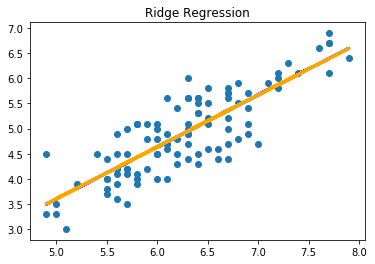

In [5]:
ridge = linear_model.RidgeCV()
ridge.fit(Xreg, yreg)
y_pred3 = ridge.predict(Xreg)
plt.scatter(X[50:, 0 ], X[50:, 2])
plt.plot(Xreg, y_pred2, color='blue', linewidth=3)
plt.plot(Xreg, y_pred3, color='orange', linewidth=3)
plt.title("Ridge Regression")
ridge.score(Xreg, yreg)


### Lasso Regression (OLS w/ L1 Regularization)
Linear regression that estimated sparse coefficients. Reduces the number of dependent variables in your model (feature selection). Uses an absolute weight penalty (L1). As before LassoCV() cross validates for the optimal value of alpha.

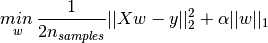

0.68637620694711776

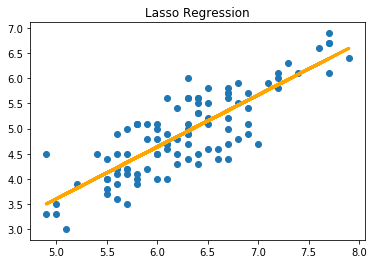

In [6]:
lasso = linear_model.LassoCV()
lasso.fit(Xreg, yreg)
y_pred4 = lasso.predict(Xreg)
y_pred3 = ridge.predict(Xreg)
plt.scatter(X[50:, 0 ], X[50:, 2])
plt.plot(Xreg, y_pred4, color = "orange", linewidth = 3)
plt.title('Lasso Regression')
lasso.score(Xreg, yreg)

### Elastic Net Regression (OLS w/ L1 and L2)
A linear regression model with both L1 and L2 weight penalties. Creates a sparse model (like LASSO), that maintains the regularization effects that ammeliorate multicollinearity (Ridge). The amount of L1 vs L2 shrinkage is chosen with the l1_ratio parameter.

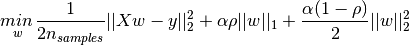

Useful for building sparse models when multicollinearity is expected. ElasticNetCV sets the optimal parameter for alpha and l1_ration by LOO CV

0.6863740653953887

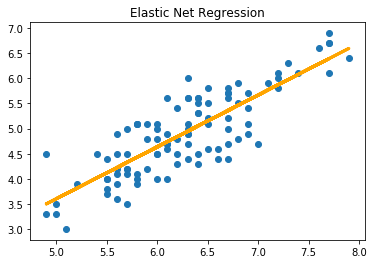

In [7]:
elast = linear_model.ElasticNetCV()
elast.fit(Xreg, yreg)
y_pred5 = elast.predict(Xreg)
y_pred3 = ridge.predict(Xreg)
plt.scatter(X[50:, 0 ], X[50:, 2])
plt.plot(Xreg, y_pred5, color='orange', linewidth=3)
plt.title("Elastic Net Regression")
elast.score(Xreg, yreg)


## Linear Classifiers

### Logistic Regression
Linear classifier that models probabilities of an outcome using the logistic function. Can fit binary classification or multiclass with OVR strategies. Can be customized with L1 or L2 regularization.

In this method the L2 penalty term is included in the following cost function
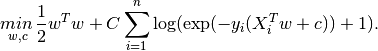

Whereas the L1 penalty term is included here.
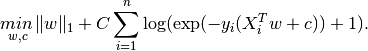

#### Solvers in SkLearn
There are 5 different solvers in the SciKit Learn implementation.
"liblinear" uses the LIBLINEAR C++ library to optimize computation speed. Can only operate with L1 reg. 

The “lbfgs”, “sag” and “newton-cg” solvers only support L2 penalization and are found to converge faster for some high dimensional data.

"sag" uses a stochastic average gradient descent as an optimizer function and works well with very long and wide data. (faster) Remember that GD needs a smooth cost function and L1 regularization is not smooth

"saga" is a variant of "sag" that can utilize the L1 regularization


#### Which Solver to use
In a nutshell, one may choose the solver with the following rules:

Case	      Solver

L1 penalty	“liblinear” or “saga”

Multinomial loss	“lbfgs”, “sag”, “saga” or “newton-cg”

Very Large dataset (n_samples)	“sag” or “saga”


"Saga" is often the best choice, but for very large datasets that require online learning use the SGDClassifier with 'log' loss. Creates a logistic regression that runs on stochast grad descent.

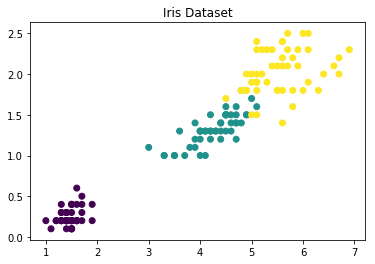

In [8]:
plt.scatter(X[:,2],X[:,3], c = iris.target)
plt.title('Iris Dataset')
plt.show()

In [9]:
import os
os.chdir('C:\\Users\\Harrison\\Documents\\GitHub\\ML-Notes')
X = X[:, [2,3]]
X_train = X_train[:,[2,3]]
X_test = X_test[:,[2,3]]

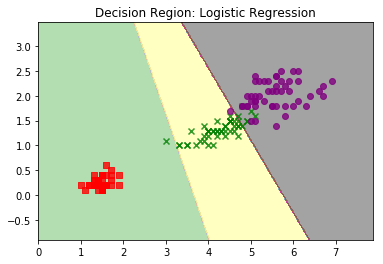

Logistic Regression Accuracy: 0.947368421053


In [10]:
from VisualFuncs import VDR
logreg = linear_model.LogisticRegressionCV()
logreg.fit(X_train, y_train)
y_class = logreg.predict(X_test)
VDR( X, y, logreg)
plt.title('Decision Region: Logistic Regression')
plt.show()
print('Logistic Regression Accuracy:', metrics.accuracy_score(y_test, y_class))

### Stochastic Gradient Descent - Log Loss

Simple way to fit linear models for very very large datasets that might not fit in memory. The "parital_fit" method allows online learning.

SGDClassifier() and SGDRegressor() allow linear classification and regression models to be fit with different convex loss functions.

loss = "log" logistic regression
loss = "hinge" SVM Classifier

In [11]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
X_sc = sc.transform(X)

C:\Users\Harrison\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


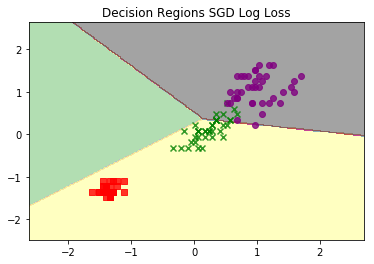

SGD Classifier w/ log loss:  0.526315789474


In [41]:
sgd = SGDClassifier(loss = 'log')
sgd.fit(X_train_sc, y_train)
y_class = sgd.predict(X_test_sc)
VDR( X_train_sc, y_train, sgd)
plt.title('Decision Regions SGD Log Loss')
plt.show()
print('SGD Classifier w/ log loss: ', metrics.accuracy_score(y_test, y_class))

### Perceptron
Updates weights to create a hyperplane segregating the data. Must be linearly seperable to converge.
Scale your data.

C:\Users\Harrison\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


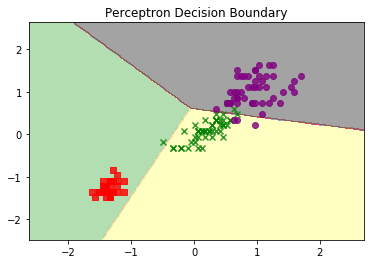

Perceptron Accuracy:  0.947368421053


In [13]:
percep = linear_model.Perceptron()
percep.fit(X_train_sc, y_train)
y_class3 = percep.predict(X_test_sc)
VDR(X_sc, y, percep)
plt.title('Perceptron Decision Boundary')
plt.show()
print('Perceptron Accuracy: ', metrics.accuracy_score(y_test, y_class3))

# Support Vector Machines

Used for classification, regression, and outlier detection. Works well in high D, uses support vectors in the decision function, can be applied with kernel trick.

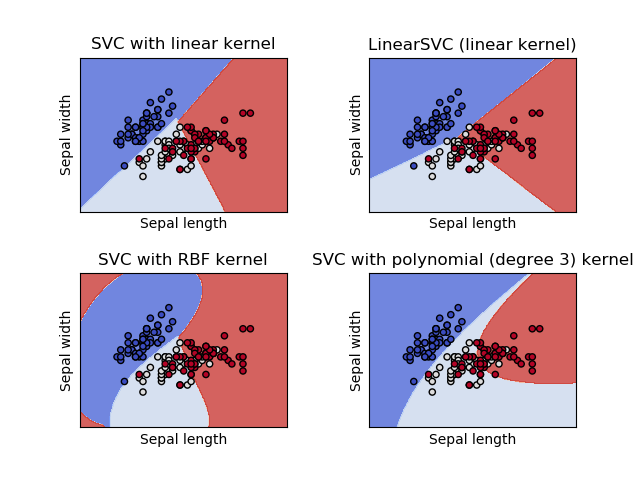



Class names are SVC, NuSVC and LinearSVC. SVC stands for C-Support Vector Classification not to be used in datasets with more than 10000 samples, since operation time is quadtatic and multiclass is handled with OVO. LinearSVC is SVC with a linear kernel, scales better to larger data sets. Handles multiclass with OVR

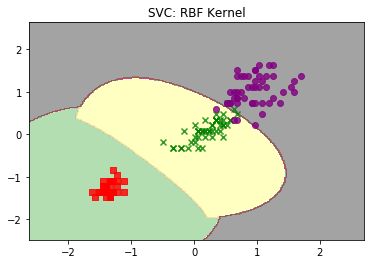

SVC Accuracy (RBF): 0.947368421053


In [30]:
from sklearn import svm
sv = svm.SVC()
sv.fit(X_train_sc, y_train)
y_class3 = sv.predict(X_test_sc)
VDR(X_sc, y, sv)
plt.title('SVC: RBF Kernel')
plt.show()
print('SVC Accuracy (RBF):', metrics.accuracy_score(y_test, y_class3))


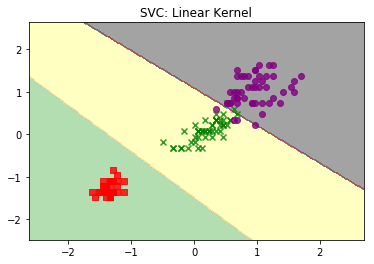

SVC Accuracy (Linear): 0.947368421053


In [31]:
sv = svm.SVC(kernel = 'linear')
sv.fit(X_train_sc, y_train)
y_class3 = sv.predict(X_test_sc)
VDR(X_sc, y, sv)
plt.title('SVC: Linear Kernel')
plt.show()
print('SVC Accuracy (Linear):', metrics.accuracy_score(y_test, y_class3))

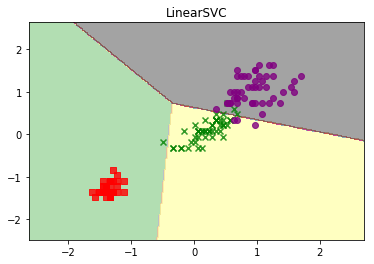

LinearSVC Accuracy:  0.947368421053


In [33]:
sv2 = svm.LinearSVC()
sv2.fit(X_train_sc, y_train)
y_class4 = sv2.predict(X_test_sc)
VDR(X_sc, y, sv2)
plt.title('LinearSVC')
plt.show()
print('LinearSVC Accuracy: ', metrics.accuracy_score(y_test, y_class4))

If I were to actually do this, we would do a Grid Search here to fine the best hyperparameters.

## SVC Scores and Probabilities

The SVC Method had a "predict_proba" method that gives class probabilities when model hyperparameter probability is set to True.

#### Actual Class

In [17]:
print('data:', X[0,:], '\nclass: ', y[0])

data: [ 1.4  0.2] 
class:  0


#### Class Predictions

In [34]:
sv = svm.SVC(probability = True)
sv.fit(X_sc, y)
prob = sv.predict_proba(X_sc[0,:].reshape(1,-1))
print(prob)

[[ 0.96915642  0.01353395  0.01730963]]


#### Predictions Across The Data Set

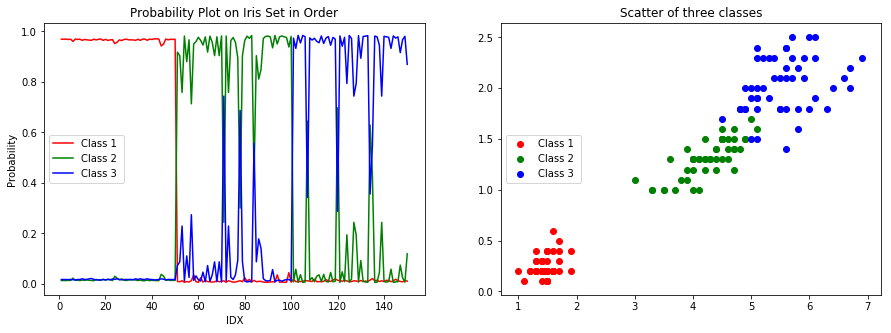

In [39]:
prob = sv.predict_proba(X_sc)
Len = list(range(1,151))
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(Len, prob[:,0], color = 'red' )
plt.plot(Len, prob[:,1], color = 'green' )
plt.plot(Len, prob[:,2], color = 'blue' )
plt.title('Probability Plot on Iris Set in Order')
plt.legend(['Class 1 ', 'Class 2', 'Class 3'], loc = 'center left')
plt.xlabel('IDX')
plt.ylabel('Probability')

plt.subplot(1,2,2)
plt.scatter(X[:50, 0],X[:50, 1] , color = 'red')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'green')
plt.scatter(X[100:150, 0],X[100:150,1], color = 'blue')
plt.title('Scatter of three classes')
plt.legend(['Class 1 ', 'Class 2', 'Class 3'], loc = 'center left')
plt.show()

#### Prediction Regions (OVR on Class 1)

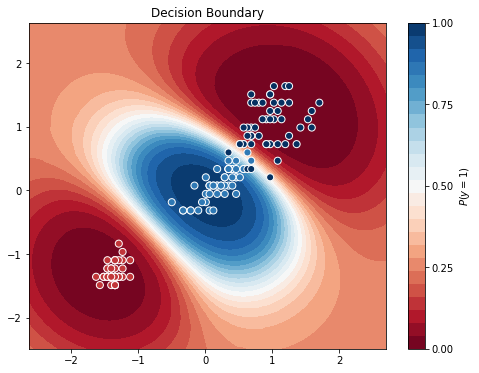

In [38]:
from VisualFuncs import LogisticVDR
LogisticVDR(X_sc, y, sv)

## Unbalanced Problem

In datasets where certain classes need to be given higher importance as a result of class frequency imbalances SVC has the "class_weight" keyword. A dictionary of the form {class_label : value}. Value is a float greater than 0 that sets regularization term C of class_label to C*value. Rememer that a higher C value means less regularization for that class.


Use Dictionary to weight specific classes differently, or set the keyword to "balanced" to have a proportional weighting.

#### Individual Class Weighting

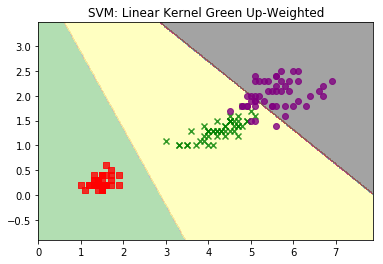

In [21]:
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X, y)
VDR(X, y, wclf)
plt.title('SVM: Linear Kernel Green Up-Weighted')
plt.show()

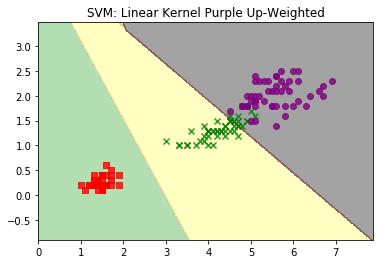

In [22]:
wclf = svm.SVC(kernel='linear', class_weight={2: 13})
wclf.fit(X, y)
VDR(X, y, wclf)
plt.title('SVM: Linear Kernel Purple Up-Weighted')
plt.show()

#### Balanced Class Weighting

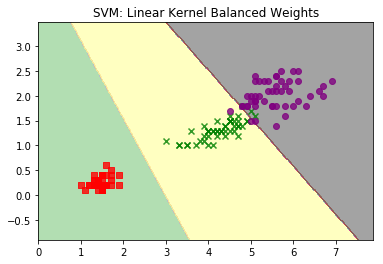

In [23]:
wclf = svm.SVC(kernel='linear', class_weight = 'balanced')
wclf.fit(X, y)
VDR(X, y, wclf)
plt.title('SVM: Linear Kernel Balanced Weights')
plt.show()

## SVM Density Estimation, Novelty Detection

OneClass SVM is used for Novelty Detection. Given a set of samples, it will detect the soft boundary of that sset.

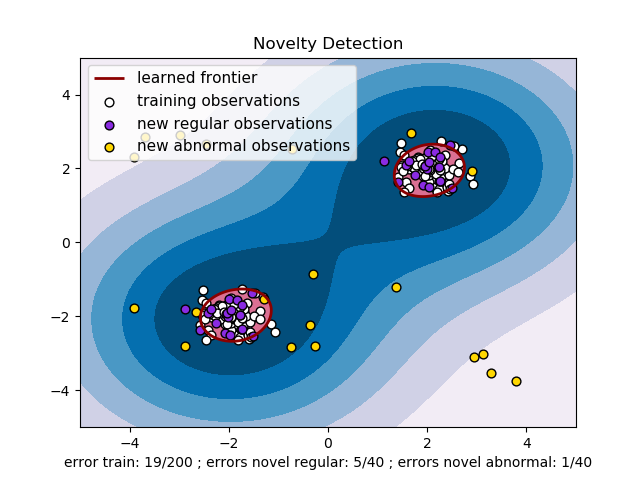

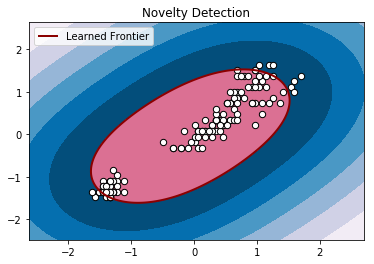

In [40]:
from VisualFuncs import OneClassVDR
# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_sc)
OneClassVDR(X_sc, y, clf )



## SVM: In Practice
Setting C: C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it (More regularization).

Support Vector Machine algorithms are not scale invariant, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1. Note that the same scaling must be applied to the test vector to obtain meaningful results. See section Preprocessing data for more details on scaling and normalization.

In SVC, if data for classification are unbalanced (e.g. many positive and few negative), set class_weight='balanced' and/or try different penalty parameters C.


# Stochastic Gradient Descent

Learn linear classifiers under convex loss functions (SVMs and Logistic Regression). Given that the data is sparse SGD models easily scale to problems with 100,000 training examples and 100,000 features.

Remember SGD is sensitive to feature scaling. Warning Make sure you permute (shuffle) your training data before fitting the model or use shuffle=True to shuffle after each iteration.

In [7]:
shroom = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header = None)
X= shroom.iloc[:,1:]
y = shroom.iloc[:,0]
import sklearn.preprocessing as prep
le = prep.LabelEncoder()
y = le.fit_transform(y)
X = pd.get_dummies(X, drop_first = True)
X_train, X_test, y_train, y_test = ms.train_test_split(X,y)

#### Fitting a SGD w/ Hinge Loss to Mushroom Set

In [11]:
from sklearn.linear_model import SGDClassifier
from sklearn. metrics import classification_report, accuracy_score


clf = SGDClassifier(loss = 'hinge', penalty = 'l1')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print('accuracy', metrics.accuracy_score(y_test, pred))
print(classification_report(y_test, pred, target_names = ['Not Deadly', 'Deadly']))

accuracy 0.999015263417
             precision    recall  f1-score   support

 Not Deadly       1.00      1.00      1.00      1073
     Deadly       1.00      1.00      1.00       958

avg / total       1.00      1.00      1.00      2031



SGDClassifier also supports class_weight to rebalance certain classes.

### Tips on Practical Use

- SGD is sensitive to feature scaling, so standardize your data!

- alpha is the regularization term and is best found with GridSearchCV

